In [8]:
import matplotlib.pyplot as plt

from aidefender.utils.data import load_cats_and_dogs
from aidefender.models import TensorFlowModel
from aidefender.attacks import FastGradientSignAttack

In [18]:
model_path = '../artifacts/models/customvision_cats_and_dogs_tf/'
data_path = '../artifacts/data/cats_dogs_small/'

target_sample_id = 7
labels_dict = {0: 'cat', 1: 'dog'}

# Load data and model

In [19]:
images, labels = load_cats_and_dogs(data_path)

In [20]:
model = TensorFlowModel(model_path)

In [21]:
preds = model.predict(images)

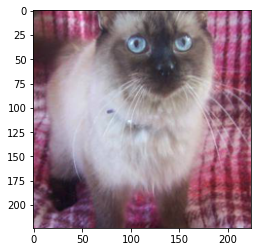

In [22]:
plt.imshow(images[target_sample_id])

In [23]:
preds[target_sample_id].argmax(), labels[target_sample_id]

(0, 0)

# Attack the model!

In [24]:
attack = FastGradientSignAttack()

In [25]:
images_adv = attack.run(model, images)

In [26]:
preds_adv = model.predict(images_adv)

In [27]:
preds_adv[target_sample_id].argmax(), preds[target_sample_id].argmax(), labels[target_sample_id]

(1, 0, 0)

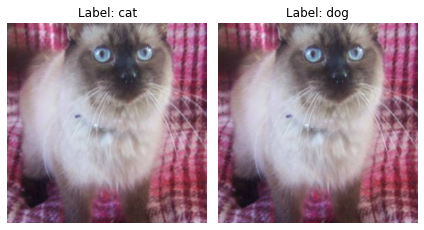

In [28]:
fig, (ax1,ax2) = plt.subplots(1, 2)

ax1.imshow(images[target_sample_id])
ax2.imshow(images_adv[target_sample_id])

image_label = labels_dict[preds[target_sample_id].argmax()]
image_adv_label = labels_dict[preds_adv[target_sample_id].argmax()]
ax1.set_title(f'Label: {image_label}')
ax2.set_title(f'Label: {image_adv_label}')

ax1.set_axis_off()
ax2.set_axis_off()

fig.tight_layout()